In [ ]:
#If opening in colab run this cell
!git clone https://github.com/RubingLi123/foster_2023spring.git
%cd foster_2023spring/Homeworks

Cloning into 'foster_2023spring'...
remote: Enumerating objects: 334, done.
remote: Counting objects: 100% (232/232), done.
remote: Compressing objects: 100% (167/167), done.
remote: Total 334 (delta 87), reused 170 (delta 52), pack-reused 102
Receiving objects: 100% (334/334), 53.07 MiB | 17.87 MiB/s, done.
Resolving deltas: 100% (127/127), done.
Updating files: 100% (59/59), done.
/content/foster_2023spring/Homeworks/foster_2023spring/Homeworks/foster_2023spring/Homeworks


# Homework 1

## Part 2: Graduate admissions case study

You've been hired by Hudson University as a data analyst for the Graduate Admissions Department. Since the admission process is long and tedious, it often results in a bottleneck for other subsequent tasks, such as planning the necessary resources to accommodate the admitted students (e.g. housing, classes, etc). You have been asked to build a model to predict which students will be admitted using the following historical data: 

1. Serial No. (serves as unique identifier)
2. GRE Scores (out of 340) 
3. TOEFL Scores (out of 120) 
4. University Rating (out of 5).
5. Statement of Purpose Strength (out of 5)
6. Letter of Recommendation Strength (out of 5) 
7. Undergraduate GPA (out of 10) 
8. Research Experience (either 0 or 1) 
9. Chance of Admit (ranging from 0 to 1)

The chances of admit for the applicants in your data were assessed by an expert. Given that this list of application attributes would be available early in the admission process for future applications (except for Chance of Admit), a model predicting chances of admit would allow planning tasks to start earlier.

For the following numbered items, **follow any directions and answer any questions**.  Optional parts carry no credit, but should be helpful for your learning.

In [ ]:
# Some libraries you may need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Trick to display plots inline with the rest of your notebook.
%matplotlib inline

** 1. Load the homework data into a pandas data frame. Print the number of rows and columns in the dataset. **

In [ ]:
data_path = "./data/data-hw1.csv"
#YOUR CODE HERE
data_applicants = pd.read_csv(data_path)
rows_count = data_applicants.shape[0]
cols_count = data_applicants.shape[1]

print("Rows Count: " + str(rows_count) + ', ' + "Columns Count: " + str(cols_count))

Rows Count: 500, Columns Count: 9


(Optional) Rename the columns in the dataframe to manipulate the data more easily. This will make your life easier.  Show a few lines with the new column names.

In [ ]:
data_applicants.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
# Put your (optional) answer here.
# Here are some suggested column names: "ID", "GRE", "TOEFL", "Rating", "SOP", "LOR", "CGPA", "Research", "Admit"
data_applicants.rename(columns={'Serial No.':'ID', 'GRE Score':'GRE', 'TOEFL Score':'TOEFL', 'University Rating':'Rating', 'Chance of Admit':'Admit'}, inplace = True);

In [ ]:
data_applicants.head()

,ID,GRE,TOEFL,Rating,SOP,LOR,CGPA,Research,Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


** 2. Show descriptive statistics for all columns. **

In [ ]:
#YOUR CODE HERE
data_applicants.describe()

,ID,GRE,TOEFL,Rating,SOP,LOR,CGPA,Research,Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


(Optional 2) Drop the column "Serial No". This will be helpful to visualize things later on.

In [ ]:
#YOUR CODE HERE
data_applicants = data_applicants.drop(['ID'], axis = 1);
data_applicants.head()

,GRE,TOEFL,Rating,SOP,LOR,CGPA,Research,Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


** 3. What is the distribution of the chances of admit? Plot a histogram of this variable. **

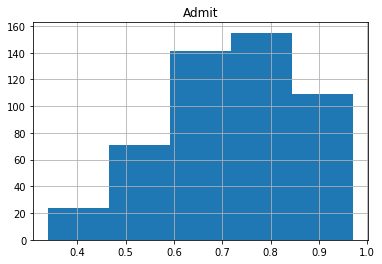

In [ ]:
#YOUR CODE HERE
data_applicants.hist("Admit", bins=5)
plt.title("Admit")
plt.show()

** 4. Chances of admit seem to vary quite a bit. How much of this depends on research experience? Print the average chance of admit against research. (this can be done using a groupby) **

In [ ]:
#YOUR CODE HERE
data_applicants.groupby(['Research'])['Admit'].mean()


Research
0    0.634909
1    0.789964
Name: Admit, dtype: float64

# Answer: From the above distribution, it is quite evident that the chances of admit increases considerably for a student who has had prior research experience. 

** 5. Does the distribution of chances of admit change with university rating? Plot a histogram of chances of admit for each university rating. (Plot 5 histograms) **

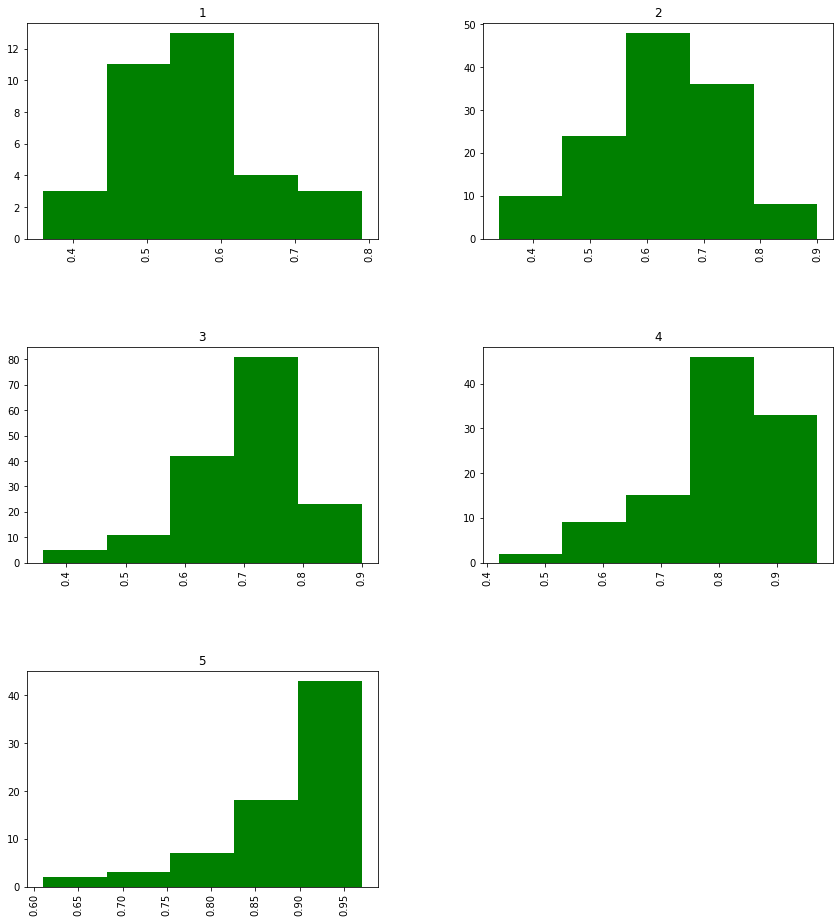

In [ ]:
#YOUR CODE HERE
data_applicants.hist("Admit", by='Rating', bins=5, figsize = (14,16), color="Green")
plt.title("Admit chances based on Rating")
plt.show()

** 6. Another way to look at the relationship between two variables is through scatter plots. Plot a scatter plot between TOEFL Score and chance of admit. **

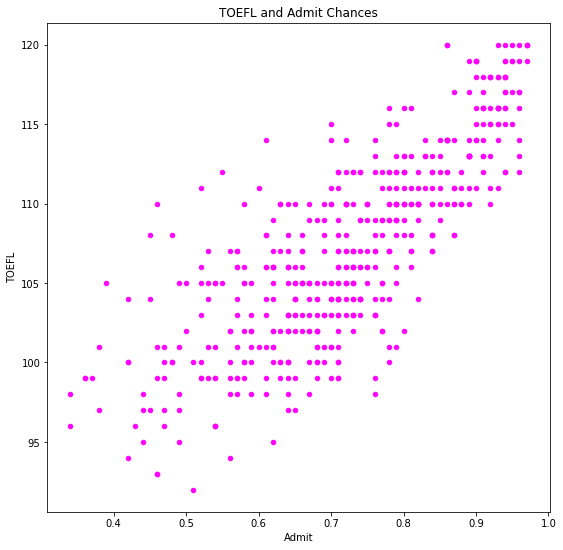

In [ ]:
#YOUR CODE HERE
data_applicants.plot.scatter(x="Admit", y="TOEFL", color="Magenta", figsize = (9,9))
plt.title("TOEFL and Admit Chances")
plt.show()

** 7. Boxplots are also useful to look at the relationship between a categorical variable and a numeric variable. Plot a boxplot of chance of admit grouped by "University Rating". (check out seaborn) **

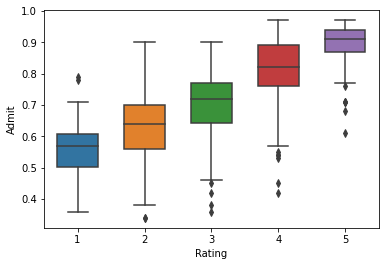

In [ ]:
#YOUR CODE HERE
sns.boxplot(x="Rating", y="Admit", width=0.6, data=data_applicants)
plt.show()

** 8. Very often it is useful to quantify how strong is the relationship between different variables. For example, measures of correlation, such as Pearson's correlation coefficient, can show whether one numeric variable gives information on another numeric variable. Pandas allows us to compute the Pearson correlation coefficient between all pairs of columns in our dataframe. Display the correlations between all pairs of columns. **

In [ ]:
#YOUR CODE HERE
corrMatrix = data_applicants.corr();
corrMatrix


,GRE,TOEFL,Rating,SOP,LOR,CGPA,Research,Admit
GRE,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


** 9. Heatmaps are a tool for conveniently visualizing correlation data. Plot these correlations as a seaborn heatmap. Which pairs of variables are most closely correlated? Which variable gives the most information on chance of admit? **

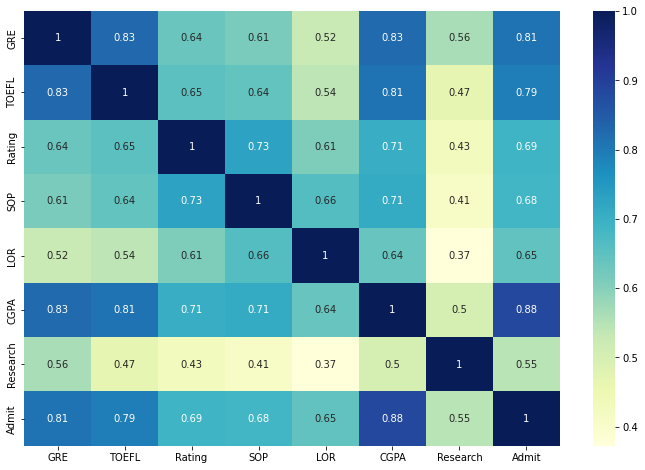

In [ ]:
#YOUR CODE HERE
f = plt.figure(figsize=(12,8))
dataPlot = sns.heatmap(data_applicants.corr(), cmap = "YlGnBu", annot = True)

# Answer : Based on the above correlation matrix, it can be analysed that the CGPA attribute has the highest correlation with Admit chances with scores of 0.88. This indicates that the CGPA variable gives the most information on chances of admit.

** 10. Build a linear model to predict the chance of admit using the application info available. Generate predictions and compare predicted quantity to the actual value in a scatter plot. ** Recommendation: try this before Class 2.  We will start on the details of predictive modeling in Class 2, so having tried it first will give you better context for the class.  You can refer to the predictive modeling code at the end of the (Dealing with Data) notebook from the first class.

In [ ]:
#YOUR CODE HERE
from sklearn import linear_model
import warnings
from sklearn import metrics

# Seperating columns into attributes and target varibles
X = data_applicants.drop(['Admit'], axis = 1);
y = data_applicants[['Admit']]

lin_model = linear_model.LinearRegression()
lin_model.fit(X, y)
print ("Accuracy = %.3f" % (lin_model.score(X, y)))




Accuracy = 0.822


** 11. (Optional) There are many different types of predictive models, each with their own plusses and minuses. For this task, repeat your modeling performed in last question, but using a sklearn.ensemble.RandomForestRegressor. How does the scatter plot compare with the prior results? **

In [ ]:
from sklearn.ensemble import RandomForestRegressor
#YOUR CODE HERE
reg_model = RandomForestRegressor(max_depth=2, random_state=0)
y = data_applicants['Admit']
reg_model.fit(X, y)
print ("Accuracy = %.3f" % (reg_model.score(X, y)))


Accuracy = 0.779
